In [1]:
from ugropy import abdulelah_gani_s, instantiate_mol_object

import pandas as pd

import numpy as np

from rdkit.Chem import Draw
from rdkit import Chem

In [2]:
df = pd.read_csv("abdulelah_gani_frags/log_p.csv", index_col="SMILES", sep="|", comment="?")

primary = np.linspace(221, 350, 130, dtype=int).astype(str)

df = df[primary]
df.rename(columns=lambda col: int(col) if col.isdigit() else col, inplace=True)

In [3]:
for idx, smiles in enumerate(df.index):
    solution = abdulelah_gani_s.get_groups(smiles, "smiles")
    
    # Filtrar las columnas de la fila que no sean iguales a 0
    row = df.loc[smiles][df.loc[smiles] != 0]
    
    # Convertir la fila filtrada a diccionario
    row_dict = row.to_dict()

    # Verificar si ninguna solución tiene subgroups_numbers igual a row_dict
    if solution.subgroups_numbers != row_dict:
        print(smiles)
        print(idx)
        print("Subgrupos:")
        print(str(solution.subgroups))  # Convertir a string y unir con saltos de línea
        print("Subgrupos por número:")
        print(str(solution.subgroups_numbers))  # Convertir a string y unir con saltos de línea
        print("Gani: ")
        print(row_dict)
        
        wrong_smiles = smiles
        break

BrC1=CC2=C(S1)N3C(C)=NN=C3CN=C2c4ccccc4Cl
11
Subgrupos:
{'(N=C)cyc-CH3': 2}
Subgrupos por número:
{346: 2}
Gani: 
{324: 1, 346: 1}


In [4]:
mol = instantiate_mol_object(wrong_smiles, "smiles")

abdulelah_gani_s.detect_fragments(mol)

{'(N=C)cyc-CH3_0': (6, 7, 8), '(N=C)cyc-CH3_1': (9, 7, 8)}

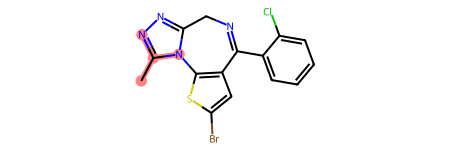

In [5]:
mol

In [6]:
column_sums = df.sum()

# Identificar columnas cuya suma es igual a 0
columns_with_zero_sum = column_sums[column_sums == 0].index.tolist()

In [7]:
columns_with_zero_sum

[225, 238, 256, 264, 276, 280, 308, 314, 342]